# Graph Plotter

<div class="alert alert-warning">
  <strong>Note!</strong><br> 
  All graph created by plotly.
</div>

In [1]:
# plotly
import plotly.graph_objects as go
import plotly
from plotly.subplots import make_subplots
# basic package
import pandas as pd
import glob
import config
import numpy as np
import re
from datetime import date
import os
import pickle
# wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# plot
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import base64
from io import BytesIO
from os import path
from PIL import Image
# from pivottablejs import pivot_ui
from IPython.display import IFrame
import json, io
# html
from IPython.display import HTML

In [2]:
df = pd.read_pickle('../Data/web_lod_data.pkl')

In [3]:
df.head()

,datetime,website,page_version,actionID
0,2020-01-10,taobao,mobile,9
1,2020-01-03,Amazon,mobile,2
2,2020-01-01,Amazon,app,7
3,2020-01-03,Amazon,app,8
4,2020-01-07,taobao,app,4


## Case 1

In [4]:
df_group = df.groupby(['datetime', 'website', 'page_version']).size().reset_index(name='size')
df_group = df_group.sort_values(by='datetime')
idsite_pageversion_group = df_group.groupby(['website', 'page_version'])
idsite_pageversion_group_key = idsite_pageversion_group.groups.keys()

In [5]:
all_group_datetime_li = []
all_group_action_count_li = []
for key in idsite_pageversion_group_key:
    group = idsite_pageversion_group.get_group(key)
    datetime_li = sorted(list(set(group['datetime'])))
    action_count_li = list(group['size'])
    all_group_datetime_li.append(datetime_li)
    all_group_action_count_li.append(action_count_li)

In [6]:
group_key_li = list(idsite_pageversion_group_key)
idsite_li = [i[0] for i in group_key_li]
pageVersion_li = [i[1] for i in group_key_li]

In [7]:
li=[]
for idsite in ['Amazon', 'taobao']:
    li.append(dict(label=str(idsite),
                method="update",
                args=[{"visible": [i== idsite for i in idsite_li]},
                      {"title": f"Action Count on {idsite} website",
                       "annotations": [],
                       "title_x": 0.5
                      },
                     ]
               ))

In [8]:
# Initialize figure
fig = go.Figure()
for datetime, value, idsite, pageVersion in zip(all_group_datetime_li, all_group_action_count_li, idsite_li, pageVersion_li):
    if idsite == 'Amazon':
        fig.add_trace(
            go.Scatter(x=datetime,
                       y=value,
                       name=pageVersion,
#                        line=dict(color="#FFA500"),
                       visible=True
                      ))
        
    elif idsite == 'taobao':
        fig.add_trace(
            go.Scatter(x=datetime,
                       y=value,
                       name=pageVersion,
#                        line=dict(color="#33CFA5"),
                       visible=False
                      ))


fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list(li),
            bordercolor = "#BEC8D9",  # default
            type="buttons",  # "dropdown" 
            direction="down",
            showactive=True, # Highlights active dropdown item or active button if True.    
        )
    ])   
        

# Set title
fig.update_layout(
                 title={
        'text': f"Action Count on {li[0]['label']} website",
        'font':{'size':30}
                 })
# fig.update_layout(title_font_color="#FFA500")

fig.update_layout(title_x=0.5)

plotly.offline.plot(fig, auto_open=False, filename=f"../Fig/action_count.html")

'../Fig/action_count.html'

## Case 2

In [9]:
df_group = df.groupby(['datetime', 'website', 'page_version', 'actionID']).size().reset_index(name='action_count')

In [10]:
df_group = df_group.sort_values(by='datetime')

In [11]:
df_group

,datetime,website,page_version,actionID,action_count
0,2020-01-01,Amazon,app,1,3
30,2020-01-01,taobao,app,2,1
31,2020-01-01,taobao,app,3,6
32,2020-01-01,taobao,app,4,3
33,2020-01-01,taobao,app,5,2
...,...,...,...,...,...
539,2020-01-10,Amazon,web,4,8
540,2020-01-10,Amazon,web,5,5
541,2020-01-10,Amazon,web,6,3
528,2020-01-10,Amazon,mobile,3,5


In [12]:
idsite_group = df_group.groupby('website')

In [13]:
idsite_group_key = idsite_group.groups.keys()

In [14]:
idsite_group_key

dict_keys(['Amazon', 'taobao'])

In [15]:
for idsite_key in idsite_group_key:
    temp_df = idsite_group.get_group(idsite_key)
    temp_df = temp_df.reset_index(drop=True)
    action_pageversion_group = temp_df.groupby(['actionID', 'page_version'])
    action_pageversion_group_key = action_pageversion_group.groups.keys()
    
    all_group_datetime_li = []
    all_group_action_count_li = []
    for action_pageversion_key in action_pageversion_group_key:
        group = action_pageversion_group.get_group(action_pageversion_key)
        datetime_li = sorted(list(set(group['datetime'])))
        action_count_li = list(group['action_count'])
        all_group_datetime_li.append(datetime_li)
        all_group_action_count_li.append(action_count_li)
    
    group_key_li = list(action_pageversion_group_key)
    action_li = [i[0] for i in group_key_li]
    pageVersion_li = [i[1] for i in group_key_li]
    

        
    li=[]
    action_dim_id = ['1','2','3','4','5','6','7','8','9','10']
    for i in action_dim_id:
        li.append(dict(label=str(i),
                    method="update",
                    args=[{"visible": list(np.array(action_dim_id) == i)},
                          {"title": f"Dimension{i} Count", "annotations": []}
                         ]
                   ))        

        
    
        
    # Initialize figure
    fig = go.Figure()
    for datetime, value, action, pageVersion in zip(all_group_datetime_li, all_group_action_count_li, action_li, pageVersion_li):
        if action == '7':
            fig.add_trace(
                go.Scatter(x=datetime,
                           y=value,
                           name=pageVersion,
    #                        line=dict(color="#FFA500"),
                           visible=True
                          ))

        elif action != '7':
            fig.add_trace(
                go.Scatter(x=datetime,
                           y=value,
                           name=pageVersion,
    #                        line=dict(color="#33CFA5"),
                           visible=False
                          ))


    fig.update_layout(
        updatemenus=[
            dict(
                active=6,  # action 7 will show, when beginning
                buttons=list(li),
                bordercolor = "#BEC8D9",  # default
                type="dropdown",  # "buttons" 
                direction="down",
                showactive=True, # Highlights active dropdown item or active button if True.    
            )
        ])   


    # Set title
    fig.update_layout(
                     title={
            'text': f"Action{li[6]['label']} Count",
            'font':{'size':30}
                     })
    # fig.update_layout(title_font_color="#FFA500")

    fig.update_layout(title_x=0.5)

    plotly.offline.plot(fig, auto_open=False, filename=f"../Fig/{idsite_key}_action_count.html")

## Case3

In [16]:
keyword_search_in_website = pd.read_pickle('../Data/keyword.pkl')

In [17]:
# 微軟正黑體(標準)
msjh = FontProperties(fname=r"c:\windows\fonts\msjh.ttc")
# 微軟正黑體(粗體)
msjhbd = FontProperties(fname=r"c:\windows\fonts\msjhbd.ttc")
# Segoe UI(標準)
segoeui = FontProperties(fname=r"c:\windows\fonts\segoeui.ttf")
# segoeuib(粗體)
segoeuib = FontProperties(fname=r"c:\windows\fonts\segoeuib.ttf")
# 微軟正黑體大小 8
msjh_small = FontProperties(fname=r"c:\windows\fonts\msjh.ttc", size=8)

In [18]:
keyword_search_in_website = ' '.join(keyword_search_in_website['keyword'].tolist())

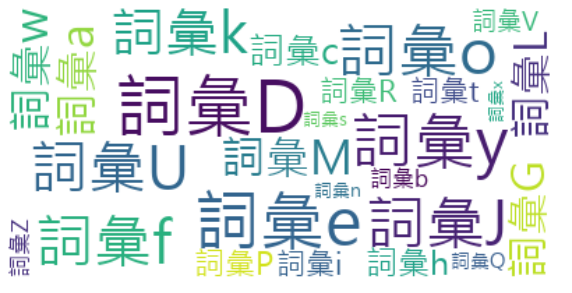

In [19]:
wc = WordCloud(font_path="c:\windows\fonts\msjh.ttc", max_font_size=50, max_words=100, background_color="white")
wc.generate(keyword_search_in_website)


#plot sth
tmpfile = BytesIO()

fig = plt.figure(figsize=(10,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

fig.savefig(tmpfile, format='png')
encoded = base64.b64encode(tmpfile.getvalue()).decode('utf-8')

html = '<img src=\'data:image/png;base64,{}\'>'.format(encoded)

with open('../Fig/wordcloud.html','w') as f:
    f.write(html)

## Pivot Table

### Create HTML Template for Pivot Table

#### Create Pivot Table by Using `Pivottablejs`
[Reference]('https://github.com/nicolaskruchten/jupyter_pivottablejs')

---
```python
df = pd.read_pickle('../Data/meta_data/data_action_count.pkl')
def pivot_ui(df, **kwargs):
    import pivottablejs
    class _DataFrame(pd.DataFrame):
        def to_csv(self, **kwargs):
            return super().to_csv(**kwargs).replace("\r\n", "\n")
    return pivottablejs.pivot_ui(_DataFrame(df), **kwargs)
pivot_ui(df, 
         rendererName= ["Table"],
         rows= ["idsite"],
         cols= ["page_version"],
         outfile_path="../Fig/pivot_demo_tpl.html")
```
---

**Through above code, we can get the html file. Next step, extracting part of html code we need.**

In [20]:
TEMPLATE = u"""
<!DOCTYPE html>
<html>
    <head>
        <meta charset="UTF-8">
        <title>PivotTable.js</title>

        <!-- external libs from cdnjs -->
        <link rel="stylesheet" type="text/css" href="https://cdnjs.cloudflare.com/ajax/libs/c3/0.4.11/c3.min.css">
        <script type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/d3/3.5.5/d3.min.js"></script>
        <script type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/c3/0.4.11/c3.min.js"></script>
        <script type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/jquery/1.11.2/jquery.min.js"></script>
        <script type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/jqueryui/1.11.4/jquery-ui.min.js"></script>
        <script type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/jquery-csv/0.71/jquery.csv-0.71.min.js"></script>


        <link rel="stylesheet" type="text/css" href="https://cdnjs.cloudflare.com/ajax/libs/pivottable/2.19.0/pivot.min.css">
        <script type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/pivottable/2.19.0/pivot.min.js"></script>
        <script type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/pivottable/2.19.0/d3_renderers.min.js"></script>
        <script type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/pivottable/2.19.0/c3_renderers.min.js"></script>
        <script type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/pivottable/2.19.0/export_renderers.min.js"></script>

        <style>
            body {font-family: Verdana;}
            .node {
              border: solid 1px white;
              font: 10px sans-serif;
              line-height: 12px;
              overflow: hidden;
              position: absolute;
              text-indent: 2px;
            }
            .c3-line, .c3-focused {stroke-width: 3px !important;}
            .c3-bar {stroke: white !important; stroke-width: 1;}
            .c3 text { font-size: 12px; color: grey;}
            .tick line {stroke: white;}
            .c3-axis path {stroke: grey;}
            .c3-circle { opacity: 1 !important; }
            .c3-xgrid-focus {visibility: hidden !important;}
        </style>
    </head>
    <body>
        <script type="text/javascript">
            $(function(){

                $("#output").pivotUI(
                    $.csv.toArrays($("#output").text())
                    , $.extend({
                        renderers: $.extend(
                            $.pivotUtilities.renderers,
                            $.pivotUtilities.c3_renderers,
                            $.pivotUtilities.d3_renderers,
                            $.pivotUtilities.export_renderers
                            ),
                        hiddenAttributes: [""]
                    } 
                    , %(kwargs)s
                    , %(json_kwargs)s)
                ).show();
             });
        </script>
        <div id="output" style="display: none;">%(csv)s</div>

    </body>
</html>
"""


def pivot_cht_ui(df, outfile_path, url="",
    width="100%", height="500",json_kwargs='',  **kwargs):
    with io.open(outfile_path, 'wt', encoding='utf8') as outfile:
        csv = df.to_csv(encoding='utf8')
        if hasattr(csv, 'decode'):
            csv = csv.decode('utf8')
        outfile.write(TEMPLATE %
            dict(csv=csv, kwargs=json.dumps(kwargs),json_kwargs=json_kwargs))
  
    return IFrame(src=url or outfile_path, width=width, height=height)

In [21]:
# only appear in windows os
def clean_whitespace_in_df(df):
    class _DataFrame(pd.DataFrame):
        def to_csv(self, **kwargs):
            return super().to_csv(**kwargs).replace("\r\n", "\n")
    return _DataFrame(df)

In [22]:
df = pd.read_pickle('../Data/web_lod_data.pkl')

In [23]:
clean_df = clean_whitespace_in_df(df)

### Html Template for Pivot Table

In [24]:
pivot_cht_ui(clean_df,
             outfile_path="../Fig/pivot_demo.html",
             rendererName= ["Table"],
             rows= ["website"],
             cols= ["page_version"],
             )

## plot two plotly graph together

In [25]:
df = pd.read_pickle('../Data/web_lod_data.pkl')
df_group = df.groupby(['datetime', 'website']).size().reset_index(name='size')

In [26]:
Amazon_df = df_group.query("website=='Amazon'")
Amazon_va_df = Amazon_df.groupby('datetime').agg({'size': 'sum'}).reset_index(drop=False)

In [27]:
taobao_df = df_group.query("website=='taobao'")
taobao_va_df = taobao_df.groupby('datetime').agg({'size': 'sum'}).reset_index(drop=False)

In [28]:
display(Amazon_va_df.head(),taobao_va_df.head())

,datetime,size
0,2020-01-01,109
1,2020-01-02,100
2,2020-01-03,95
3,2020-01-04,103
4,2020-01-05,84


,datetime,size
0,2020-01-01,94
1,2020-01-02,106
2,2020-01-03,87
3,2020-01-04,95
4,2020-01-05,97


In [29]:
fig = make_subplots(rows=1, cols=2)

fig.add_scatter(x=Amazon_va_df['datetime'], y=Amazon_va_df['size'], mode="lines", row=1, col=1)
fig.add_scatter(x=taobao_va_df['datetime'], y=taobao_va_df['size'], mode="lines",row=1, col=2, marker=dict(color="MediumPurple"))

# Hide legend
fig.update_layout(
    showlegend=False,
    title_text="Combine Multiple Plots In One Graph",
    height=500,
    width=800,
)
plotly.offline.plot(fig, auto_open=False, validate=False, filename=f"../Fig/muti_graph_demo.html")


'../Fig/muti_graph_demo.html'

## Table

### Interactive Table

In [30]:
keyword_search_in_website = pd.read_pickle('../Data/keyword.pkl')

In [31]:
keyword_search_in_website = ' '.join(keyword_search_in_website['keyword'].tolist())

In [32]:
keyword_li = keyword_search_in_website.split()

In [33]:
from collections import Counter
keyword_count = Counter(keyword_li)

In [34]:
df = pd.DataFrame.from_dict(keyword_count, orient='index').reset_index()
df.columns = ['key_word', 'count']
df = df.sort_values(by='count', ascending=False)
df = df.query("count>1")
df = df.reset_index(drop=True)

In [35]:
df.head()

,key_word,count
0,詞彙y,20
1,詞彙o,19
2,詞彙f,17
3,詞彙D,17
4,詞彙d,17


In [36]:
base_html = """
<!doctype html>
<html>
    <head>
        <meta http-equiv="Content-type" content="text/html; charset=utf-8">
        <script type="text/javascript" src="https://ajax.googleapis.com/ajax/libs/jquery/2.2.2/jquery.min.js"></script>
        <link rel="stylesheet" type="text/css" href="https://cdn.datatables.net/1.10.16/css/jquery.dataTables.css">
        <script type="text/javascript" src="https://cdn.datatables.net/1.10.16/js/jquery.dataTables.js"></script>
    </head>
    <body>%s
        <script type="text/javascript">$(document).ready(function(){$('table').DataTable({
            "pageLength": 10
        });});
        </script>
    </body>
</html>
"""

def df_html(df):
    """HTML table with pagination and other goodies"""
    df_html = df.to_html()
    return base_html % df_html


In [37]:
with open('../Fig/interactive_df.html','w', encoding='utf8') as f:
    f.write(df_html(df))

### Static Table

In [38]:
static_table_with_link = '''
<html>
    <body>
        <table class="table table-striped">
            <th>中文名</th><th>英文全名</th><th>公司代號</th>
            <tr>
                <td><a href="https://www.amazon.com/">亞馬遜</a></td>
                <td>Amazon</a></td>
                <td>AMZN</td>
            </tr>
            <tr>
                <td><a href="https://world.taobao.com/product/%E6%B7%98%E5%AF%B6%E5%A4%A7%E9%99%B8.htm">淘寶</a></td>
                <td>Taobao</td>
                <td>BABA</td>
            </tr>
        </table>
    </body>
</html>
'''
HTML(static_table_with_link)

亞馬遜,Amazon,AMZN
淘寶,Taobao,BABA


In [39]:
with open('../Fig/static_table_with_link.html', 'w', encoding='utf8') as f:
    f.write(static_table_with_link)

In [40]:
data = [['脫褲子放屁', '多此一舉'],
        ['翹著屁股看天', '有眼無珠'],
        ['茅廁裡跌倒', '離死不遠了']]

In [41]:
df = pd.DataFrame(data, columns=['第一句', '第二句'])

In [42]:
static_table = df.to_html().replace('<table border="1" class="dataframe">','<table class="table table-striped">') # use bootstrap styling

In [43]:
static_table = f'''
<html>
    <body>
    {static_table}
    </body>
</html>
'''

In [44]:
HTML(static_table)

,第一句,第二句
0,脫褲子放屁,多此一舉
1,翹著屁股看天,有眼無珠
2,茅廁裡跌倒,離死不遠了


In [45]:
with open('../Fig/static_table.html', 'w', encoding='utf8') as f:
    f.write(static_table)